In [1]:
import geopandas as gpd
import pandas as pd
import pygmt
import matplotlib
import numpy as np

In [2]:
df = gpd.read_file(r'data/Solar_PV_Capacity_Factor_in_Colorado_2015.geojson')
df['dni'] = pd.to_numeric(df['dni'],errors='coerce')
df.to_crs("EPSG:4326", inplace=True)


In [3]:
quantiles = []
for i in np.arange(0,1.1,0.1):
    quantiles.append(df.quantile(np.round(i,1))[0])

In [4]:
df['bins']=pd.cut(df.dni,bins = quantiles,
                  labels=['10','20','30','40','50','60','70','80','90','100'])

In [5]:
q1, q2, q3, q4, q5, q6, q7, q8, q9, q10 = [],[],[],[],[],[],[],[],[],[]
q1.append(df[df["bins"]=="10"][['dni', 'geometry']])
q2.append(df[df["bins"]=="20"][['dni', 'geometry']])
q3.append(df[df["bins"]=="30"][['dni', 'geometry']])
q4.append(df[df["bins"]=="40"][['dni', 'geometry']])
q5.append(df[df["bins"]=="50"][['dni', 'geometry']])
q6.append(df[df["bins"]=="60"][['dni', 'geometry']])
q7.append(df[df["bins"]=="70"][['dni', 'geometry']])
q8.append(df[df["bins"]=="80"][['dni', 'geometry']])
q9.append(df[df["bins"]=="90"][['dni', 'geometry']])
q10.append(df[df["bins"]=="100"][['dni', 'geometry']])

In [6]:
norm = matplotlib.colors.Normalize(vmin=df.dni.min(), vmax=df.dni.max())
cmap = matplotlib.cm.get_cmap('gray')
q1c = matplotlib.colors.rgb2hex(cmap(norm(quantiles[1])))
q2c = matplotlib.colors.rgb2hex(cmap(norm(quantiles[2])))
q3c = matplotlib.colors.rgb2hex(cmap(norm(quantiles[3])))
q4c = matplotlib.colors.rgb2hex(cmap(norm(quantiles[4])))
q5c = matplotlib.colors.rgb2hex(cmap(norm(quantiles[5])))
q6c = matplotlib.colors.rgb2hex(cmap(norm(quantiles[6])))
q7c = matplotlib.colors.rgb2hex(cmap(norm(quantiles[7])))
q8c = matplotlib.colors.rgb2hex(cmap(norm(quantiles[8])))
q9c = matplotlib.colors.rgb2hex(cmap(norm(quantiles[9])))
q10c = matplotlib.colors.rgb2hex(cmap(norm(quantiles[10])))

region = [-109.5, -101.5, 36.5, 41.5]
fig = pygmt.Figure()
fig.basemap(region=region, projection="M4i", frame=["a",'+t"Colorado Solar PV Capacity Factor"'])
fig.coast(borders=["2/1.5p,white"], land="#001e03", water="black")

for parts in q1:
    fig.plot(data=parts,color=q1c, pen=["0.02c", q1c], label='"10% Quantile"')
for parts in q2:
    fig.plot(data=parts,color=q2c, pen=["0.02c", q2c], label='"20% Quantile"')
for parts in q3:
    fig.plot(data=parts,color=q3c, pen=["0.02c", q3c], label='"30% Quantile"')
for parts in q4:
    fig.plot(data=parts,color=q4c, pen=["0.02c", q4c], label='"40% Quantile"')
for parts in q5:
    fig.plot(data=parts,color=q5c, pen=["0.02c", q5c], label='"50% Quantile"')
for parts in q6:
    fig.plot(data=parts,color=q6c, pen=["0.02c", q6c], label='"60% Quantile"')
for parts in q7:
    fig.plot(data=parts,color=q7c, pen=["0.02c", q7c], label='"70% Quantile"')
for parts in q8:
    fig.plot(data=parts,color=q8c, pen=["0.02c", q8c], label='"80% Quantile"')
for parts in q9:
    fig.plot(data=parts,color=q9c, pen=["0.02c", q9c], label='"90% Quantile"')
for parts in q10:
    fig.plot(data=parts,color=q10c, pen=["0.02c", q10c], label='"100% Quantile"')
fig.legend(position="JTR+o1c/0c+w7c/0.5c",)
fig.text(text=["https://data.colorado.gov/Energy/Solar-PV-Capacity-Factor-in-Colorado-2015/f325-6r9c/data"], x=-106, y=36.8, font=["4p",'white'])

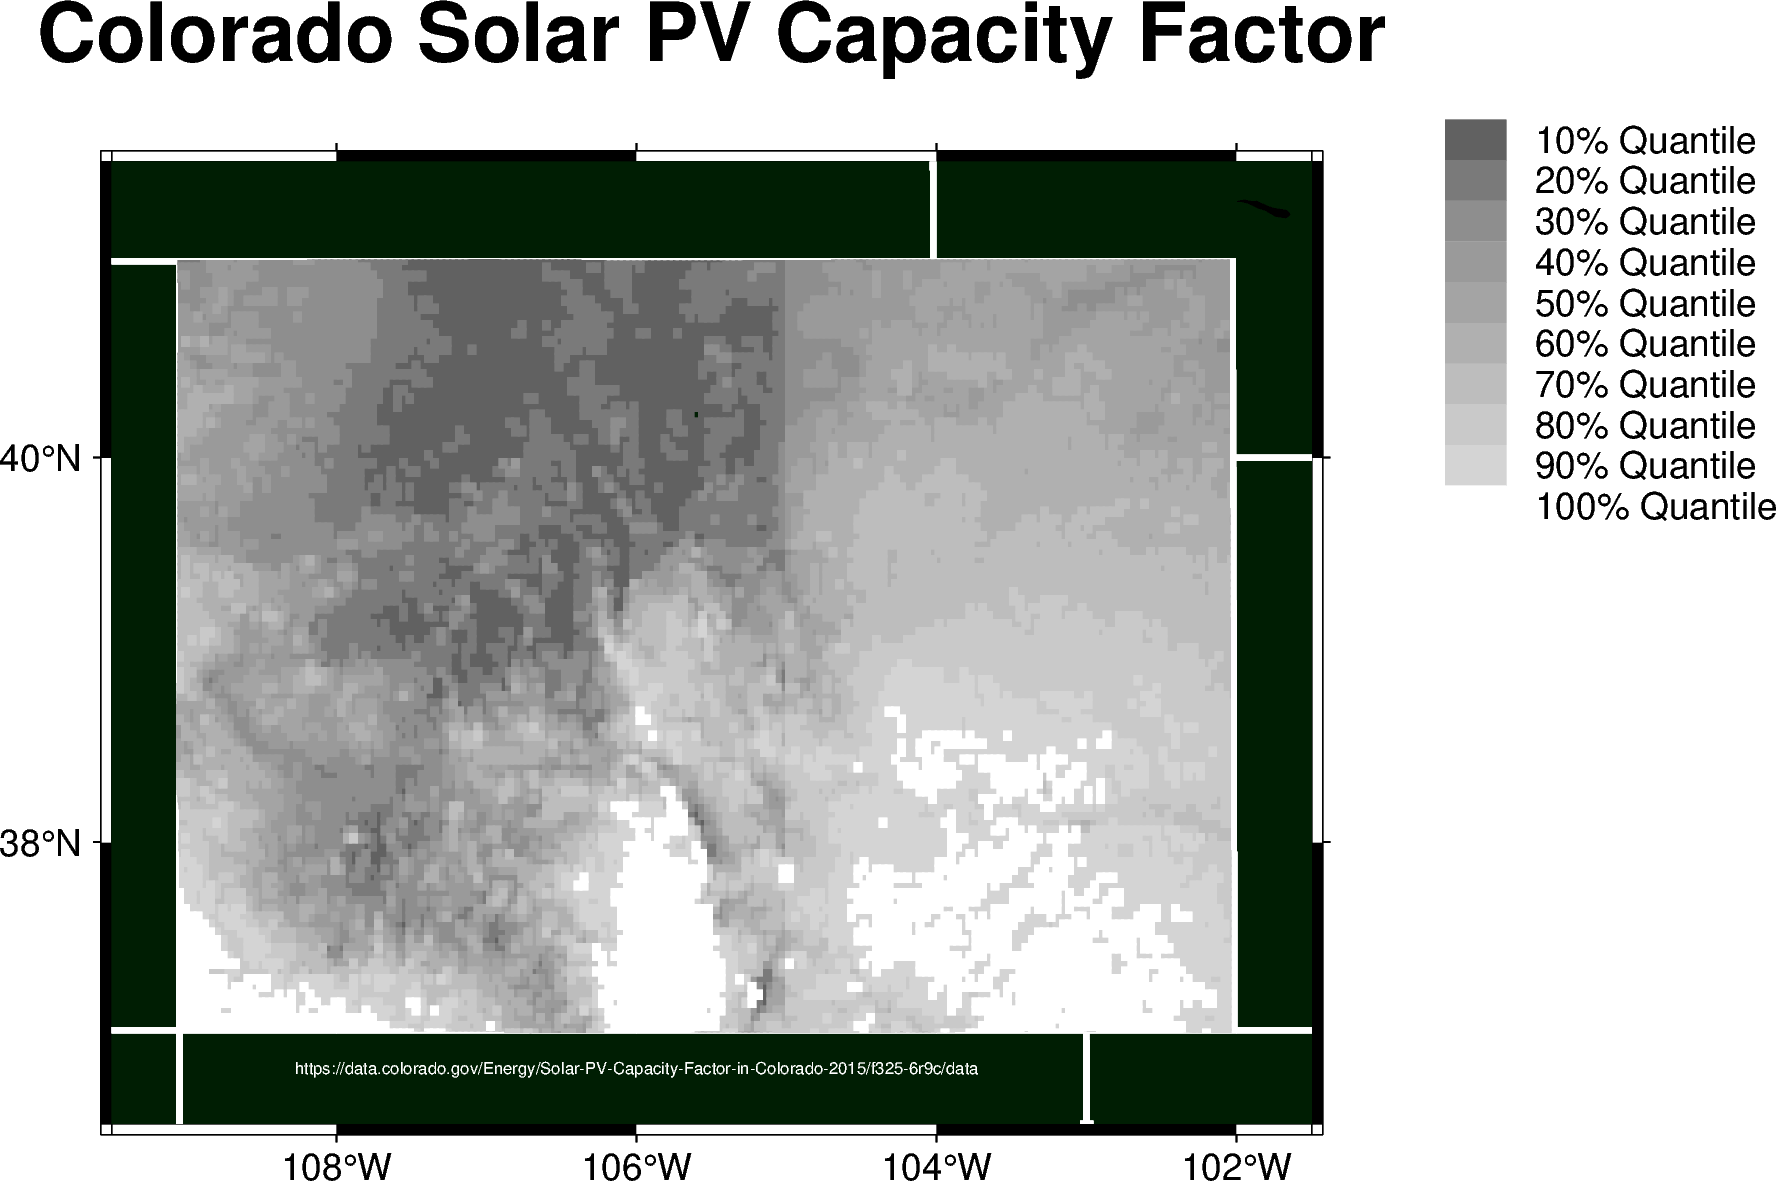

In [7]:
fig.show(width=1000)

In [8]:
fig.savefig("Day_9.png")